# PROJECT 2: Network Optimization and Non-linear Models 

### Authors: 
1. Ángela María Durán Pinto // 100472766
2. Diego Hernández Suárez // 100472809

### Subject: Optimization and Analytics

# Introduction

Build and solve two realistic problems:
 1. Network optimization: one optimization model with discrete variables and a network structure

 2. Non-linear optimization: one model with a non-linear objective and at least one non-trivial constraint (linear or non-linear)

a) Formulate the network optimization problem as a discrete model (Topic 2), identifying
mathematically the variables and constraints associated with the network. Solve and interpret the
solution.
<br>
b) Formulate (mathematically) and solve a non-linear optimization problem based on real
(or realistic) world data. Interpret the solution.


# P1) Network optimization: MULTIPLE VEHICLE ROUTING PROBLEM

## P1.1) Problem description

The Vehicle Routing Problem (VRP) is a classic combinatorial optimization issue prevalent in logistics and transportation. Its primary objective is to strategically plan routes for a fleet of vehicles to efficiently serve a specified set of customers, each with known demands for goods or services. The fundamental challenge revolves around minimizing the overall transportation cost, often measured in terms of distance traveled, time taken, or other pertinent metrics.

Key Components of the VRP:

1. Customers: The problem revolves around a group of customers, each situated at specific geographical points.

2. Vehicle Fleet: A fleet of identical vehicles, each equipped with limited capacity for transporting goods or delivering services.

3. Customer Demand: Each customer possesses a predetermined demand for goods or services, a requirement that the delivery vehicles must fulfill.

4. Vehicle Capacity: Vehicles are constrained by a limited capacity for carrying goods, with the total demand served by a vehicle in a route not exceeding its designated capacity.

5. Routing Constraints: The fleet of vehicles must visit all customers, but a customer can onl be visited by one vehicle only one time.

6. Objective Function: The primary aim is to minimize the comprehensive transportation cost, incorporating factors such as the total distance covered, time taken, and other operational expenses.

Addressing the VRP entails determining an optimal or near-optimal set of routes that adhere to all specified constraints. A variety of optimization algorithms, including heuristics, metaheuristics, and exact methods, can be applied based on the complexity and scale of different VRP instances. The VRP finds extensive application in industries such as transportation, distribution, and logistics, where efficient route planning contributes to substantial cost savings and enhanced service quality.

In this case, assume a delivery company which objective is to study where to place the deposits to station the vehicles and the main purpose is to try to hand in all the packages traveling the lowest distance as possible. In this case, we will work with a fleet of 2 vehicles that will need to deliver all the packages travelling the minimum distance as possible taking advantage that there are 2 vehicles instead of only 1. For our project, we will not take into consideration the return to the deposit because we want to focus on optimizing the most optimal path to serve all the customers as fast as possible.

# Explaining and solving the linear optimization problem

## P1.1) Libraries 

Here we are going to write all the libraries that were used during the assigment. However, the essential one is the pyomo library, which is the one used in order to create and optimize the model.

In [1]:

from pyomo.environ import * 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


## P1.2) Generate dataset

In order to create a realistic data set to simulate a real problem, for this reason we did some reasearches and took into consideration the professors Traveling Salesman Problem (TSP) in order to create a cost distance data set that could give the information to know the distance between a clients. 

We decided to have a total of 20 clients and a fleet of 2 vehicles that should cover all the customers. 

With all this information, we were able to create a network that could interconnect between all the nodes in order to create a optimal path where the model could find the most optimal way to serve all the customers (pass through all the nodes) taking into consideration that there are 2 vehicles that can go through the different clients.

In [2]:
n = 20  # Number of customers
vehicles = range(1,3)  # 2 vehicles

Cost distances map where we plot the distances between all the clients. It is important to mention that a distance between a client and itself (for instance, Cost[6][6]) will be equal to 0 because it is the same place.

In [3]:
Cost = [
    [0, 25, 40, 15, 30, 50, 10, 45, 60, 35, 20, 55, 5, 50, 25, 15, 30, 45, 20, 35, 15],  
    [25, 0, 35, 50, 40, 20, 45, 5, 20, 60, 30, 15, 55, 10, 30, 50, 25, 40, 20, 45, 25],  
    [40, 35, 0, 25, 30, 40, 15, 50, 35, 45, 10, 20, 60, 30, 10, 30, 40, 15, 25, 35, 40],  
    [15, 50, 25, 0, 45, 25, 40, 35, 20, 30, 55, 10, 50, 15, 40, 60, 10, 30, 25, 20, 15],  
    [30, 40, 30, 45, 0, 20, 15, 25, 10, 20, 35, 40, 15, 50, 25, 35, 5, 40, 10, 30, 30],  
    [50, 20, 40, 25, 20, 0, 45, 30, 55, 15, 25, 60, 10, 35, 50, 10, 30, 15, 25, 40, 50],  
    [10, 45, 15, 40, 15, 45, 0, 20, 25, 30, 50, 5, 55, 25, 40, 35, 5, 20, 25, 15, 10],  
    [45, 5, 50, 35, 25, 30, 20, 0, 15, 40, 60, 30, 10, 45, 20, 30, 25, 40, 10, 35, 45],  
    [60, 20, 35, 20, 10, 55, 25, 15, 0, 45, 25, 40, 30, 10, 35, 55, 20, 35, 30, 5, 60],  
    [35, 60, 45, 30, 20, 15, 30, 40, 45, 0, 25, 50, 20, 35, 10, 20, 45, 5, 25, 30, 35],  
    [20, 30, 10, 55, 35, 25, 50, 60, 25, 25, 0, 40, 45, 5, 30, 50, 10, 15, 45, 55, 20],  
    [55, 15, 20, 10, 40, 60, 5, 30, 40, 50, 40, 0, 20, 45, 15, 25, 50, 55, 5, 30, 55],  
    [5, 55, 60, 50, 15, 10, 55, 10, 30, 20, 45, 20, 0, 35, 25, 45, 30, 15, 10, 25, 5],  
    [50, 10, 30, 15, 50, 35, 25, 45, 10, 35, 5, 45, 35, 0, 40, 60, 5, 20, 25, 10, 50],  
    [25, 30, 10, 40, 25, 50, 40, 20, 35, 10, 30, 15, 25, 40, 0, 20, 35, 40, 45, 50, 25],  
    [15, 50, 30, 60, 35, 10, 35, 30, 55, 20, 50, 25, 45, 60, 20, 0, 30, 15, 10, 5, 15],  
    [30, 25, 40, 10, 5, 30, 5, 25, 20, 45, 10, 50, 30, 5, 35, 30, 0, 15, 20, 25, 30],  
    [45, 40, 15, 30, 40, 15, 20, 40, 35, 5, 15, 55, 15, 20, 40, 15, 30, 0, 25, 20, 45],  
    [20, 20, 25, 25, 10, 25, 25, 10, 30, 25, 45, 5, 10, 25, 45, 10, 20, 25, 0, 40, 20],  
    [35, 45, 35, 20, 30, 15, 25, 35, 5, 30, 55, 30, 25, 10, 50, 5, 30, 20, 40, 0, 35],  
    [15, 25, 40, 15, 30, 50, 10, 45, 60, 35, 20, 55, 5, 50, 25, 15, 30, 45, 20, 35, 0]   
]

Now that we already have the data set to work with, we can initialize the model with the ConcreteModel() class, this will create a container in order to define and solve the mathematical optimization problem.

It's worth highlighting that the choice between using ConcreteModel() or AbstractModel() in Pyomo is contingent upon specific considerations. The selection essentially hinges on the nature of the modeling problem and the desired level of abstraction.

ConcreteModel() is aptly suited for situations where the entire problem is well-defined and all parameters, variables, and constraints can be explicitly enumerated. This approach offers a straightforward and explicit representation of the optimization model.

On the other hand, AbstractModel() provides a more abstract and flexible modeling framework. This proves beneficial when dealing with problems where certain components of the model might evolve or be defined dynamically. The abstract approach allows for a more modular and extensible model structure, accommodating changes in problem specifications without the need for a complete redefinition.

In essence, the choice between these model types is a strategic decision that depends on the specific characteristics and evolving nature of the optimization problem at hand.

In our case, we opted for the ConcreteModel() approach for our Vehicle Routing Problem (VRP) implementation due to the well-defined and concrete nature of our problem instance. The VRP involves a set number of customers, fixed vehicle capacities, and known demands, allowing us to explicitly define all parameters, variables, and constraints.

By leveraging the ConcreteModel() framework, we benefit from a concise and explicit model description, simplifying the implementation and enhancing the interpretability of the VRP solution. This decision aligns with the deterministic and well-structured nature of our specific vehicle routing scenario.

In [4]:
# Create a Pyomo model
model = ConcreteModel()

## P1.3) Sets:

A set is a Pyomo component used to define and represent sets of index values. These index values are often used to describe the domains of decision variables, parameters, and indices for constraints. <br>
 
We decided to create three sets in order to study the energies, regions and the time periods. <br>
- *i* : Customer (node) of origin where vehicle *k* comes from
- *j* : Customer (node) of destiny where vehicle *k* goes to
- *k* : Identifier of a specific vehicle (1 or 2 in our case)

It is important to mention that we must firstly initialize Parameter n (later the parameters used will be explained in detail) in order to initialize the sets *i* and *j*, which takes a range set from 1 to the total number of customers. This is significant in order to have a consistent code that in the case there is a modification, the whole code can adapt to that change.

In [5]:
# Parameter to initialize the number of total clients
model.n = Param(within=NonNegativeIntegers, initialize=n)

# Sets
model.I = RangeSet(1, model.n) # Set of origin clients
model.J = RangeSet(1, model.n) # Set of destiny clients
model.K = Set(initialize=vehicles)  # Set of vehicles

## P1.4) Parameters:

A parameter is a modeling component in Pyomo that is used to represent constant values in a mathematical optimization model. Parameters are typically used to input data, coefficients, or fixed values into a model that are used in the objective function with a certain purpose or to create constraints among other goals. In other words, they are essential weights in order to quantify the impact of various factors and constraints on the objective function and decision variables within an optimization model. <br>

These are the parameters that were used during this assigment: <br>

$D_{j}$ : Amount of demand of customer *j*

$Capacity_{k}$: Total capacity of vehicle *k* to satisfy demand

$Cost_{i,j}$ : Cost of travelling from client *i* to client *j*

$T_{j}$: Maximum distance travelled to hand in a package to client *j*

In [6]:
# Data to initialize paramters

# For each customer, a demand value is generated 
demand_data = {j: 0 if j == 0 else int(2 * random.random()) for j in model.J} # 5 + int(15*random.random() for j in model.J)
 # Use random.random() for a float between 0 and 1

# Total capacity for each vehicle k
capacity_data = {k: 30 for k in model.K}

max_delivery_time_data = {j: 0 if j == 0 else 100 + int(50 * random.random()) for j in model.J}

In [7]:
# Parameters

# Demand of customer 'j' 
model.Demand = Param(model.J, initialize=lambda model, j: demand_data[j])


# Capacity of each vehicle 'k'
model.Capacity = Param(model.K, initialize=lambda model, k: capacity_data[k])


# Cost of travelling from customer 'i' to customer 'j'
model.Cost = Param(model.I, model.J, initialize=lambda model, i, j: Cost[i][j] if i > 0 and j > 0 else 0)


# Maximum time (or distance) that can be travelled before delivering the package to customer 'j'
model.MaxDeliveryTime = Param(model.J, initialize=lambda model, j: max_delivery_time_data[j])

## P1.5) Variables

Decision variables represent the quantities or values that the optimization algorithm seeks to determine in order to optimize the objective function while satisfying any given constraints, in our case, the variable X defines if wheter vehicle *k* is travelling from customer *i* to customer *j* in the case this value is 1, if vehicle *k* is not doing this path, the value of this decision variable will be 0.
<br>
For instance, if vehicle '2' is travelling from customer '16' to customer '5', then: x.model[16, 5, 2] will be equal to 1.
<br>

This is the mathematical notation for our variables: <br>
- **$X_{i,j,k}$** : Binary decision wheter if vehicle *k* will travel from customer *i* to customer *j*

In [8]:

# Binary variables
model.x = Var(model.I, model.J, model.K, initialize=0, domain=Binary)


## P1.6) Objective Function

Our main objective with this objective function is to minimize the total distance travelled between both vehicles. It is for this reason that we want to compute the minimization of the summatory of distances for all the customers 'i' where vehicles 'k' travelled from to all the customers 'j' that the vehicles went to. It is for this reason that we must sum all the possible clients with respect to sets *i* and *j*, in order to take into account all the possible scenarios and also the sum with respect to *k* because we are studying this case for a multiple vehicle routing problem. It is for all these aspects that we must iterate between 1 and 20 two times (origin and destiny) and from 1 to 2 which are the total fleet of vehicles for this problem.

\begin{align}
min \sum_{i=1}^{20}\sum_{j=1}^{20}\sum_{k=1}^2 ( Cost_{i,j}*X_{i,j,k})
\end{align}

In [9]:
# Obj
def Obj_rule(model):
    return sum(sum(sum(model.Cost[i, j] * model.x[i, j, k] for k in model.K)for i in model.I if (i != j)) for j in model.J) 

model.Obj = Objective(rule=Obj_rule, sense=minimize)

## P1.7) Constraints


Constraints are essential conditions that must be met to be sure about the validity of a solution in an optimization problem. They serve a critical role in marking the feasible region of the optimization problem, directing the optimization algorithm to explore solutions that align with predefined limitations previously established. <br>

They act as guiding principles, shaping the space within which the optimization algorithm searches for the most optimal solution but getting limited by these constraints to ensure reliable and useful results.

**1) Visit Once Constraint:** <br>
    
This constraint ensures that each customer is visited exactly once by one of the available vehicles. The summation on the left side of the inequality iterates over all vehicles k and all other customers j (excluding the current customer i), summing up the binary decision variables model.x[i, j, k]. The constraint is satisfied if this sum is equal to 1, signifying that exactly one vehicle visits the customer i.

Mathematically, the constraint is expressed as:

\begin{align}
min \sum_{j=1}^{20}\sum_{k\ \in \ model.K} ( X_{i,j,k}) = 1,  \qquad       \text{for each}\ {i}\ \in \text{model.I}
\end{align}


In [10]:

# Ensures that each customer is visited exactly once by one vehicle.
def in_rule(model, i):
    return sum(model.x[i, j, k] for k in model.K for j in model.J if (j != i)) == 1

model.in_Constraint = Constraint(model.I, rule=in_rule)


**2) Leave Once Constraint:** <br>

This constraint ensures that each customer is left exactly once by one of the available vehicles. Similar to the "Visit Once" constraint, this constraint ensures the integrity of the routes by guaranteeing that each customer is served and subsequently left by exactly one vehicle. The summation on the left side iterates over all vehicles k and all other customers i (excluding the current customer j), summing up the binary decision variables model.x[i, j, k]. The constraint is satisfied if this sum is equal to 1 for each customer j.

<br>
In mathematical notation would be:

\begin{align}
min \sum_{i=1}^{20}\sum_{k\ \in \ model.K} ( X_{i,j,k}) = 1,  \qquad       \text{for each}\ {j}\ \in \text{model.J}
\end{align}

In [11]:

# Ensures that each customer is left exactly by one vehicle


def out_rule(model, j):
    return sum(model.x[i, j, k] for k in model.K for i in model.I if (i != j)) == 1

model.out_Constraint = Constraint(model.J, rule=out_rule)

**3) Cyclic Ordering Constraint:** <br>

This set of constraints is designed to avoid cycles in the vehicle routes by introducing an ordering variable u for each customer i and each vehicle k. These variables represent the order in which the customers are visited by each vehicle.

- The variable u_{1, k} is set to 1, indicating that it is the starting point of the route for each vehicle.

- For other customers (i ≠ 1), the variable u_{i, k} is constrained to be greater than or equal to 2, ensuring that their order of visitation is at least 2 or higher.

We could expressed it like:


\begin{align*}
& \text{for } i = 1 \text{ and each } k \in \text{model.K}, & \quad & U_{i,k} = 1 \\
& \text{for } i \neq 1 \text{ and each } k \in \text{model.K}, & \quad & U_{i,k} \geq 2 \\
\end{align*}


These constraints play a crucial role in maintaining the acyclicity of the vehicle routes, preventing the formation of cycles and ensuring the integrity of the solution in a vehicle routing problem.


In [12]:

# Constraints to avoid cycles
model.u = Var(model.I, model.K, domain=NonNegativeReals)

# Ensures that the ordering variable 'u' for the node 1 is set to 1,
# and for other customers, it is greater than or equal to 2.
def u1_constraint_rule(model, i, k):
    if i == 1:
        return model.u[i, k] == 1
    else:
        return model.u[i, k] >= 2

model.u1_Constraint = Constraint(model.I, model.K, rule=u1_constraint_rule)


**4) Maximum Order Constraint:** <br>

This constraint ensures that the variable u representing the order of visitation for each customer does not exceed the total number of customers. The ordering variable u_{i, k} is constrained to be less than or equal to the total number of customers model.n.

Mathematically, the constraint is expressed as:

\begin{align}
U_{i,k} <= n
\end{align}



In [13]:

# Ensures the variable 'u' representing the order of visitation
# for each customer does not exceed the total number of customers.
def u2_constraint_rule(model, i, k):
    return model.u[i, k] <= model.n

model.u2_Constraint = Constraint(model.I, model.K, rule=u2_constraint_rule)


**5) Cyclic Route Constraint:** <br>

This constraint ensures that each vehicle's route remains acyclic, preventing the formation of sub-tours. It utilizes the ordering variable u to enforce the acyclicity of the routes.

- For each pair of distinct customers i and j and each vehicle k, if neither i nor j i and i is not equal to j, the constraint is active. It ensures that the difference between the ordering variables u_{i, k} and u_{j, k}, plus 1, is less than or equal to (model.n - 1) times the binary decision variable 1 - model.x[i, j, k]. This binary variable is 1 when the vehicle travels directly from i to j and 0 otherwise.

Mathematically, the constraint is expressed as:

\begin{align*}
& \quad  U_{i,k} - U_{j,k} + 1 \leq (n - 1) \times (1 - X_{i,j, k}). 
& \quad \text{if } i \neq 1 \text{ and } j \neq 1 \text{ and } i \neq j, \\
& \text{for each } i \in \text{model.I, } j \in \text{model.J, } k \in \text{model.K}, \\
\end{align*}

    
This constraint plays a crucial role in preventing the creation of sub-tours within the routes of each vehicle, ensuring the overall integrity of the solution in a vehicle routing problem.


In [14]:


# Ensures each vehicle's route remains acyclic, preventing sub-tours.
def cycle_constraint_rule(model, i, j, k):
    if i != 1 and j != 1 and i != j:
        return model.u[i, k] - model.u[j, k] + 1 <= (model.n - 1) * (1 - model.x[i, j, k])
    else:
        return Constraint.Skip

model.cycle_Constraint = Constraint(model.I, model.J, model.K, rule=cycle_constraint_rule)


**6) No Inverse Travel Constraint:** <br>

This constraint ensures that if a vehicle k travels from customer i to customer j, it cannot simultaneously travel from j to i. The summation on the left side of the inequality iterates over all vehicles k and checks whether the binary decision variables model.x[i, j, k] and model.x[j, i, k] both equal 1. If this sum is less than or equal to 1, the constraint is satisfied, indicating that the vehicle travels in only one direction between i and j.

Mathematically, the constraint is expressed as:

\begin{align}
\sum_{{k\ \in \ \text{model.K}}} ( X_{i,j,k} + X_{i,j,k}) \leq 1, \quad \text{for each } i \in \text{model.I}, j \in \text{model.J}
\end{align}

In [15]:

# Constraint to ensure that if vehicle k travels from i to j, then it cannot travel from j to i


def no_inverse_travel_rule(model, i, j, k):
    return sum(model.x[i, j, k] + model.x[j, i, k] for k in model.K) <= 1

model.no_inverse_travel_Constraint = Constraint(model.I, model.J, model.K, rule=no_inverse_travel_rule)

**7) Capacity Constraint:** <br>

This constraint ensures that each vehicle's capacity is not exceeded, taking into consideration the demand of each customer. The left side of the inequality sums up the product of the demand of each customer j and the binary decision variables model.x[i, j, k] for all customers i (excluding j) and all vehicles k. This product represents the total demand carried by vehicle k for all its assigned customers. The constraint is satisfied if this sum is less than or equal to the capacity of vehicle k.

Mathematically, the constraint can expressed as:

\begin{align}
 \sum_{{j\ \in \ \text{model.J}}} \left(  D_{j} \ * \sum_{{i\ \in \ \text{model.I} }}X_{i, j, k} \right) \leq \ Capacity_{k}, \quad \text{for each } k \in \text{model.K}
\end{align}

This constraint ensures that the vehicles do not exceed their specified capacity limits, making the solution feasible and practical for real-world vehicle routing scenarios.


In [17]:
# Constraint to ensure that the vehicules can only hand in packages that do not surpass their capacity 
# taking into consideration the demand of each customer

def capacity_constraint_rule(model, k):
     return sum(model.Demand[j] * sum(model.x[i, j, k] for i in model.I if (i != j)) for j in model.J) <= model.Capacity[k]

model.capacity_constraint = Constraint(model.K, rule=capacity_constraint_rule)


**8) Minimum Visits Constraint:**<br>

This constraint ensures that the minimum number of visits made by each vehicle is at least 1. The left side of the inequality sums up all binary decision variables model.x[i, j, k] for all customers i and j and all vehicles k. This sum represents the total number of visits made by vehicle k. The constraint is satisfied if this sum is greater than or equal to 1, ensuring that each vehicle makes at least one visit.

If we want to express this constraint in mathematical notation: 
<br>
\begin{align}
\sum_{{i \ \in \ \text{model.I}}} \sum_{{j \ \in \ \text{model.J}}}X_{i, j, k} \geq 1, \quad \text{for each } k \in \text{model.K}
\end{align}

This constraint guarantees that each vehicle in the model makes at least one visit, preventing scenarios where a vehicle remains idle without serving any customers. It is essential for ensuring the fulfillment of customer demands and the practicality of the vehicle routing solution.


In [18]:
# Constraint to ensure that the minimum visits that must be done by each vehicule should be at least 1
def minimum_visits(model, k):
    return sum(model.x[i,j,k] for i in model.I for j in model.J) >= 1

model.minimum_visits = Constraint(model.K, rule=minimum_visits)

## P1.8) Solve the model

Now we are going to solve the model in order to see the output,  this allows for the verification of the obtained solution, enabling a quick check to ensure that the solver found a feasible and meaningful outcome that fulfills all the constraints imposed and trying to optimize to the limit the objective function. We will also print the objective value in order to see to what extend the model optimized the problem.

In [19]:
solver = SolverFactory('glpk')
result = solver.solve(model)
print("Objective value:", model.Obj())
model.display()

Objective value: 165.0
Model unknown

  Variables:
    x : Size=800, Index=x_index
        Key         : Lower : Value : Upper : Fixed : Stale : Domain
          (1, 1, 1) :     0 :   0.0 :     1 : False : False : Binary
          (1, 1, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 2, 1) :     0 :   0.0 :     1 : False : False : Binary
          (1, 2, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 3, 1) :     0 :   0.0 :     1 : False : False : Binary
          (1, 3, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 4, 1) :     0 :   0.0 :     1 : False : False : Binary
          (1, 4, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 5, 1) :     0 :   0.0 :     1 : False : False : Binary
          (1, 5, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 6, 1) :     0 :   0.0 :     1 : False : False : Binary
          (1, 6, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 7, 1) 

## P1.9) Interpret results

Lets compute the results in a more visual way in order to understand more deeply what we obtained and how the vehicles should path in order to obtain the most optimal route. Futhermore, we can see that our objective value was 165, this means that the most optimal route taking into consideration the cost of travelling between each customer, ends up having a total of 165 cost.

### P1.9.1) Route in pairs
If we want to see the path in pairs instead than in a graph:

In [20]:
# Displaying the results in the specified format with custom starting points
starting_points = {1: 6, 2: 12}

for k in model.K:
    print(f" - Vehicle {k} Route:")
    i = starting_points[k]  # Starting point for the current vehicle
    first_pair_printed = False  # Flag to track if the first pair has been printed
    try:
        while True:
            # Find the next customer (j) visited by vehicle k
            j = next(j for j in model.J if value(model.x[i, j, k]) == 1)
            if first_pair_printed:
                print(" -> ", end="")
            print(f"({i}, {j})", end="")
            first_pair_printed = True
            if j == starting_points[k]:
                break  # End of the route
            i = j  # Move to the next customer
    except StopIteration:
        pass  # End of the route

    print()  



 - Vehicle 1 Route:
(6, 11) -> (11, 3) -> (3, 16) -> (16, 4) -> (4, 8) -> (8, 19) -> (19, 15) -> (15, 18) -> (18, 7) -> (7, 1) -> (1, 13) -> (13, 10) -> (10, 2) -> (2, 14) -> (14, 9) -> (9, 17) -> (17, 5) -> (5, 12)
 - Vehicle 2 Route:
(12, 20) -> (20, 6)


### P1.9.2) Routes for each vehicle with Graphs

We could also plot the graphs for each vehicle route in order to see it in a visual way. We are going to mark the starting and ending points in order to see where we should place the deposit and where should the vehicles end their route.

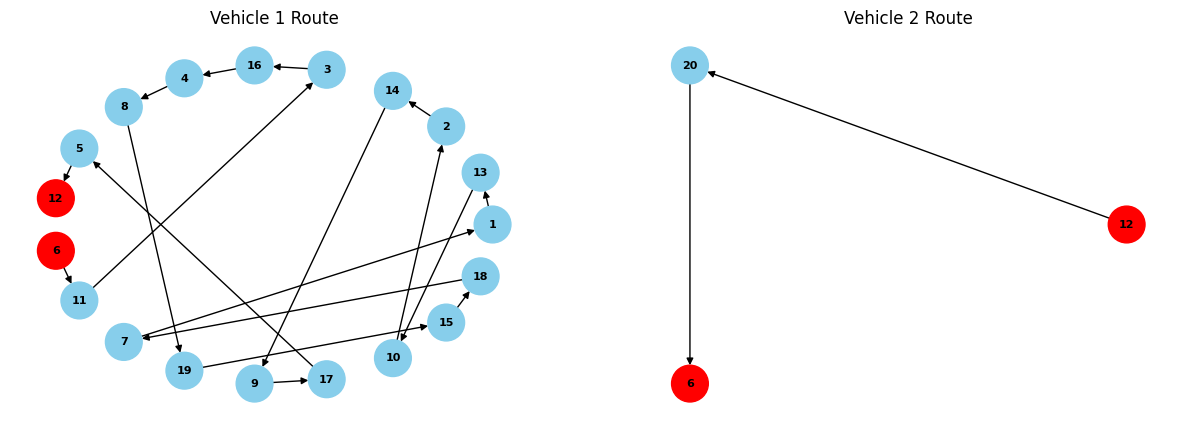

In [21]:

# Extracting the routes from the solution
routes = {k: [] for k in model.K}
for k in model.K:
    for i in model.I:
        for j in model.I:
            if i != j and value(model.x[i, j, k]) == 1:
                routes[k].append((i, j))

# Define starting and ending nodes
start_node = 12
end_node = 6

# Plotting the routes in subplots
num_plots = len(routes)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 5))

for idx, (k, route) in enumerate(routes.items()):
    G = nx.DiGraph()
    G.add_edges_from(route)
    
    pos = nx.circular_layout(G)
    
    # Set start and end nodes
    node_color = ['red' if node == start_node or node == end_node else 'skyblue' for node in G.nodes()]
    
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_color, font_size=8, arrowsize=10, ax=axes[idx])
    axes[idx].set_title(f"Vehicle {k} Route")
plt.show()





As we can see in the graphs, vehicle 1 does the significant majority of destinys, starting at customer 6 and ending at customer 12. Meanwhile we can see that vehicle 2 covers all the missing clients starting at the end point of vehicle 1, which are client 20 and client 6 as ending point. 

We can see that the starting points of each vehicle are not considered as "visited" then the other vehicle is covering each other, where each one ends at the start of the other one, probably because in the way the problem is formulated, because there is any arrow pointing at the customer which is the starting point, the model it is not considering these customers as visited in the first path, however, this is fixed by having the other vehicle ending at that client and obtaining that all the clients are visited in the lowest amount of time as possible. From this aspect we can obtain interesting conclusions related to where to place the deposits which can be also useful information in order to optimize the routes of the vehicles, by placing two different deposits very near to customer 6 and 12, we could obtain the most optimal paths in order to minimize the distance travelled by each vehicle. Thanks to this we are obtaining an interesting problem that is connecting in a directed graph a whole network while optimizing the shortest path satisfacing the customers demand and using 2 vehicles instead of only one in order to optimize even more the path.

## P1.10) Conclusion

During this problem of creating a network we decided to try to solve a hard problem of a multiple vehicle routing problem, where our objective was to find the most optimal path in order to hand in all the packages to all the clients but instead of using only 1 vehicle, using 2. In this way we could see a different approach and see to what extend could be benefitial. 


We imposed several constraints that were essential in order to ensure a correct formation of a directed graph in which only one vehicle could visit a client meanwhile all clients must be visited. We also added other constraints in order to make a more realistic problem, for instance, creating a new parameter for demand in order to fulfill the demand of all the customers taking into consideration the capacity of the vehicles. After plotting the results and showing this results in a more visual way by plotting a graph that shows the route that each vehicle must take, we got two different routes through different clients. We also noticed the model started in the most optimal starting point in order to cover all its route. 

It is important to mention that the starting and ending point of each vehicle is the opposite of the other vehicle, from this we can extract some insights of where to place the parking for the vehicles. It is relevant to talk about that the starting node of each vehicle is not considered as visited because there is any arrow pointing at it, for this reason the other vehicle ends in the starting point of the other one, this could be useful because in this way the vehicles can rotate between them starting and ending in the others point respectively. Something to mention that could be a weakness of our final model is that vehicle 1 has 18 destinations meanwhile vehicle 2 only has 2, this is probably because the model is not taking into consideration that both routes are happening at the same time. Despite this aspect, we consider we found an interesting approach to solve a problem of networks by adding a new index in our decision variables in order to include more than 1 vehicle and we also found a senseful solution in which the vehicles has a sense between the origin and the destination, where this destination is the following origin of the next path that the vehicle will do.

# P2) Non-linear optimization: WOOD PRODUCTION PROBLEM 

## P2.1) Problem description

The roots of woodworking trace back to prehistoric times when early humans fashioned tools and implements from wood to meet their basic needs. As civilizations emerged, woodworking advanced, giving rise to intricate woodcarvings, architectural marvels, and finely crafted furniture. Throughout the centuries, woodworking has remained a fundamental skill, transitioning from artisanal workshops to industrialized processes.

In the modern era, the woodworking industry faces a myriad of challenges and opportunities. Advancements in technology have introduced efficiency to production processes, enabling mass production and customization. Simultaneously, there is a growing appreciation for handmade, artisanal woodwork, emphasizing the uniqueness and craftsmanship of each piece.

Wood selection plays a pivotal role in woodworking, with different types of wood offering distinct characteristics in terms of durability, grain pattern, color, and workability. The choice of wood significantly influences the final product's quality and aesthetic appeal.

Our project delves into the contemporary challenges faced by woodworking enterprises, where the balance between tradition and innovation is crucial. The optimization problem at hand involves determining the optimal dimensions for wooden pieces, considering the intricacies of various wood types. Each wood type possesses unique attributes and, correspondingly, is associated with specific cost functions.

The goal is to maximize profit while navigating constraints related to total wood volume, surface area, and minimum production requirements. By leveraging optimization techniques and Pyomo, we aim to provide woodworkers with a data-driven approach to decision-making. This empowers them to make informed choices about the dimensions of wooden pieces, aligning with market demands, production capabilities, and the inherent characteristics of each wood type.

It is essential to mention that the production of different types of wood involves an important aspect about dimensions of the wood that must be produced in order to be transported and the needs and treat that each type of wood must have in order to ensure its quality, it is for all these reasons that producing pieces of wood of specific dimensions is important in order to sell it to carpenters or other business that works with wood in the most optimal conditions. For all these aspects, we computed individual cost functions for each of the woods, where in some of them it is a better to produce large lengths instead of heights, among other possible scenarios, that is why in this work we are going to analyze the most optimal dimensions that must be done in order to maximize profit and taking as the most important factor the non linear cost functions where depending on the size of the producition for each type of wood, can affect in a positive or negative way the profits, that after all, is the main objective of any business. 

In the pages that follow, we will delve into the specifics of the optimization model, exploring the intricacies of cost functions, constraints, and the mathematical framework used to find the optimal solution. This project not only embraces the heritage of woodworking but also propels it into the future, where tradition and technology converge to shape the wooden creations of tomorrow.

# Explaining and solving the non-linear optimization problem

In [23]:
# Create a Pyomo model
model = ConcreteModel()

## P2.2) Set

In our woodworking optimization model, we begin by defining a set of wood types, capturing the diversity of materials available. This set, named model.b, encompasses ten distinct types of pieces of wood: Oak, Mahogany, Pine, Cedar, Maple, Cherry, and Walnut, Birch, Ash, Rosewood. These varieties serve as the foundation for our subsequent modeling and decision-making processes. 

- *b* : Type of pieces of wood

In [24]:
# Define the wood types
wood_types = ["Oak", "Mahogany", "Pine", "Cedar", "Maple", "Cherry", "Walnut", "Birch", "Ash", "Rosewood"]
model.b = Set(initialize=wood_types, doc="wood_types")

## P2.3) Decision variables

We introduce decision variables to represent the dimensions of wooden blocks for each specific wood type. <br>

- **$length_{b}$** : Represents the length of wooden blocks for each wood type *b*
- **$width_{b}$** : Signifies the width of wooden blocks for each wood type *b*
- **$height_{b}$** : Represents the height of wooden blocks for each wood type *b*

These variables are constrained to non-negative real values, aligning with the physical dimensions of wooden blocks. 
  

In [25]:
# Decision variables
model.length = Var(model.b, within=NonNegativeReals, bounds=(0, 70), initialize=0)  # Initialize the variables
model.width = Var(model.b, within=NonNegativeReals, bounds=(0, 40), initialize=0)
model.height = Var(model.b, within=NonNegativeReals, bounds=(0, 15), initialize=0)

## P2.4) Parameters

Now, it is important to define our parameters. It is necessary for this problem to define other parameters as *Expressions* and not as *Parameters* as they depends on the decision variables and are not fixed. They need to be recalculated at different points during the optimization process. Expressions are useful for dynamic calculations that involve decision variables. This happens with $revenue_b$ and $cost_b$:

- $revenue Unit_b$: Represents the revenue produced for each unit of wood for different wood types
- $revenue_b$: Calculates the revenue for each type of wood based on the product of revenue per unit of volume of wood
- $demand_b$: Represents the demand for each type of wood
- $waste_b$: Represents the waste factor for each wood type, indicating the proportion of wood that goes to waste during production
- $cost_b$: Calculates the cost for each type of wood *b* using the corresponding cost function.

<br>

These parameters and expressions collectively contribute to the objective function, where the goal is to maximize the total revenue by optimizing the dimensions of each wood type while satisfying various constraints.

**Cost Functions:** <br>
These cost functions collectively capture the diverse nature of the production cost structures for different wood types, incorporating various mathematical functions to model the cost dependencies on wood dimensions.

- The cost for Oak is influenced by the sine of the length, and linear terms involving length, width, and height. This implies that the cost is sensitive to variations in these dimensions

$$ \text{cost function(Oak) } = 0.1\times\sin(length_{b}) + 4\times\ length_{b} + 0.5\times\ width_{b} + 4\times\ heigth_{b}$$

- The cost for Mahogany is influenced by an exponential function of length, width, and height, along with a logarithmic term involving width. This suggests that Mahogany production costs increase rapidly with changes in these dimensions.
  
$$ \text{cost function(Mahogany) } = 10\times \exp( length_{b} + 0.2\times\ width_{b} + 0.7\times\ heigth_{b}) +  0.1\times\log( width_{b} +1^{-6} ) $$

- The cost for Pine is influenced by linear and constant terms involving length, width, and height. This suggests a simple linear relationship with length and width, while height has a more complex impact.
  
$$ \text{cost function(Pine) } = 0.1\times\ (length_{b} + width_{b}) + -0.5\times\ heigth_{b} +0.05\times\ heigth_{b}  $$

- The cost for Cedar is dominated by a quadratic term involving the sum of length, width, and height, along with a cosine term involving width. This indicates a strong dependence on the size of the wood.
 
$$ \text{cost function(Cedar) } =(length_{b} + width_{b} + heigth_{b})^2 + 0.3\times\cos(width_{b}) $$

- The cost for Maple is influenced by linear, quadratic, and sinusoidal terms involving length, width, and height. This implies a more complex relationship with these dimensions.
  
$$ \text{cost function(Maple) } = 0.4\times\ length_{b}  + 0.3\times\ width_{b} + 0.2\times\ heigth_{b}  + 0.1\times \sin(length_{b})$$

- The cost for Cherry involves a logarithmic term with width and an exponential term involving the product of length, width, and height. This suggests sensitivity to changes in width and a rapid increase with the product of length, width, and height.
  
$$ \text{cost function(Cherry) } =  0.1\times\log( width_{b} +1^{-6} ) + \exp(0.2\times\ length_{b} +  width_{b} + 0.3\times\ heigth_{b})  $$

- The cost for Walnut is influenced by linear terms involving length, width, and height. This implies a straightforward relationship with these dimensions.

$$ \text{cost function(Walnut) } = 6\times (length_{b} +  width_{b}) + 0.5\times\ heigth_{b}$$

- The cost for Birch is influenced by linear, quadratic, and sinusoidal terms involving length, width, and height. The sinusoidal term introduces a periodic component, making the relationship more complex.
  
$$ \text{cost function(Birch) } = 0.3\times length_{b} + 0.2\times\ width_{b} + 5\times\ heigth_{b} \times\ sin(heigth_{b} )$$

- The cost for Ash involves linear, quadratic, and cosine terms involving length, width, and height. The cosine term introduces a periodic component, making the relationship more complex.
 
$$ \text{cost function(Ash) } = 5\times length_{b} + 0.4\times\ width_{b} + 2\times\ heigth_{b} + 0.2\times\ cos(length_{b} )$$

- The cost for Rosewood is influenced by linear terms involving length, width, and height. This implies a straightforward relationship with these dimensions.
  
$$ \text{cost function(Rosewood) } = 8\times (length_{b} +  width_{b} +  heigth_{b}) + 0.3\times\ heigth_{b}  )$$



In [26]:
# Parameters

# Revenue produced for each unit (cubic meter) of wood produced
revenue_unit = {
    "Oak": 45, "Mahogany": 60, "Pine": 30, "Cedar": 30, "Maple": 35, 
    "Cherry": 75, "Walnut": 45, "Birch": 70, "Ash": 85, "Rosewood": 45
}

# Demand for each type of wood
demand = {
    "Oak": 100, "Mahogany": 80, "Pine": 120, "Cedar": 90, "Maple": 110, 
    "Cherry": 70, "Walnut": 85, "Birch": 60, "Ash": 75, "Rosewood": 95
}

# Ratio of waste generated by the production of each type of wood
waste = {
    "Oak": 0.20, "Mahogany": 0.15, "Pine": 0.10, "Cedar": 0.25, "Maple": 0.48,
    "Cherry": 0.22, "Walnut": 0.32, "Birch": 0.08, "Ash": 0.30, "Rosewood": 0.57
}

model.revenue_unit = Param(model.b, initialize=revenue_unit)

model.revenue = Expression(model.b, rule=lambda m, b: m.revenue_unit[b] * m.length[b] * m.width[b] * m.height[b])

model.demand = Param(model.b, initialize=demand)
model.waste = Param(model.b, initialize=waste)

# Cost parameters depending on the production of a specific type of wood
def cost_function(m, b):
    if b == "Oak":
        return 0.1 * sin(m.length[b]) + 4 * m.length[b] + 0.5 * m.width[b] + 4 * m.height[b] 
    elif b == "Mahogany":
        return 10*exp( m.length[b] + 0.2 * m.width[b] + 0.7 * m.height[b]) + 0.2 * log(m.width[b] + 1e-6)
    elif b == "Pine":
        return 0.1 * (m.length[b] + m.width[b]) - 0.5 * m.height[b] + 0.05 * m.height[b]
    elif b == "Cedar":
        return (m.length[b] + m.width[b] + m.height[b])**2 + 0.3 * cos(m.width[b])
    elif b == "Maple":
        return 0.4 * m.length[b] + 0.3 * m.width[b] + 0.2 * m.height[b] + 0.1 * sin(m.length[b])
    elif b == "Cherry":
        return 0.1 * log(m.width[b] + 1e-6) + exp(0.2 * m.length[b] * m.width[b] + 0.3 * m.height[b]) 
    elif b == "Walnut":
        return 6 * (m.length[b] + m.width[b]) + 0.5 * m.height[b]
    elif b == "Birch":
        return 0.3 * m.length[b] + 0.2 * m.width[b] + 5 * m.height[b] * sin(m.length[b])
    elif b == "Ash":
        return 5 * m.length[b] + 0.4 * m.width[b] + 2 * m.height[b] + 0.2 * cos(m.length[b])
    elif b == "Rosewood":
        return 8 * (m.length[b] + m.width[b] + m.height[b]) + 0.3 * m.height[b]


# Cost expressions
model.cost = Expression(model.b, rule=lambda m, b: cost_function(m, b))

## P2.5) Objective function

The objective of this optimization model is to maximize the overall profit derived from producing and selling different types of wood. The objective function is formulated as a nonlinear expression, combining the revenue generated from selling each wood type with the associated production costs. The primary goal is to find the optimal production plan that maximizes the net profit.<br>

 The decision variables are adjusted during the optimization process to find the combination that yields the highest overall profit. The solver will explore different values for  the dimensions to achieve this maximization goal. <br>

 \begin{align}
max \sum_{b\ \in \ wood \ types} revenue_b - cost_b \qquad       \ =  \qquad    \ max \sum_{b\ \in \ wood \ types} (revenue\ unit_b\times\ length_{b} \times\ width_{b} \times\ heigth_{b})  - cost_b  
\end{align}


In [27]:
# Objective function (nonlinear because the revenue function and the different cost functions are non linear functions)
model.obj = Objective(
    expr=sum((model.revenue[b] - model.cost[b]) for b in model.b), 
    sense=maximize
)

## P2.6) Constraints

**1) Total volume constraint** <br>

The constraint on total wood volume produced imposes a limit on the overall volume of wood that can be manufactured in the production process. This constraint ensures that the total volume does not exceed a specified maximum value, 9000 cubic units. This constraint is essential for managing the overall capacity of the production process, preventing overproduction, and aligning the production plan with the available resources. By incorporating this constraint into the optimization model, the solution will adhere to the specified volume limit, ensuring practical feasibility in real-world manufacturing scenarios. <br>

\begin{align}
\sum_{b\ \in \ wood \ types} (length_{b} \times\ width_{b} \times\ heigth_{b}) \leq 9000
\end{align}



In [28]:
# Constraint on total wood volume produced
model.total_volume_constraint = Constraint(
    expr=sum(model.length[b] * model.width[b] * model.height[b] for b in model.b) <= 9000
)

**2) Total surface area constraint** <br>

The constraint on total surface area sets a limit on the cumulative surface area of the manufactured wood products. By incorporating this constraint into the optimization model, it allows to control the total surface area of the produced wood items, facilitating effective resource utilization and complying with spatial limitations within the manufacturing facility. This is essential for maintaining a well-organized and space-efficient production process.

\begin{align}
\sum_{b\ \in \ wood \ types} \left(2 \times (length_{b} \times\ width_{b} + width_{b}\times \ heigth_{b} +  heigth_{b} \times\ length_{b}\right)) \leq 6000
\end{align}


In [29]:
# Constraint on total surface area
model.total_surface_area_constraint = Constraint(
    expr=sum(2 * (model.length[b] * model.width[b] + model.width[b] * model.height[b] + model.height[b] *model.length[b]) for b in model.b) <= 6000
)


**3) Maximum volume constraint** <br>

The constraint to ensure the maximum volume for each wood type sets an upper limit on the volume of each type of wood produced. This constraint to control the size of each wood product, preventing them from becoming excessively large and helping to meet specific requirements or standards related to the volume of the produced items. It contributes to the optimization of the production process by establishing limits on the physical characteristics of the wood products.

\begin{align}
 length_{b} \times\ width_{b} \times \ heigth_{b} \leq 900, \quad \forall b \in \ wood \ types
\end{align}


In [30]:
# Constraint to ensure the maximum volume for each wood type does not exceed 500
model.max_volume_constraint = Constraint(model.b, rule=lambda m, b: m.length[b] * m.width[b] * m.height[b] <= 900)


**4) Wood demand constraint** <br>

The constraint to ensure the demand for each type of wood is satisfied sets a requirement that the production of each wood type must meet or exceed the specified demand. This constraint aligns the production levels with the market demand for each type of wood, ensuring that there is enough supply to fulfill customer orders or market needs, preventing underproduction.


\begin{align}
 length_{b} \times\ width_{b} \times \ heigth_{b} \geq demand_b, \quad \forall b \in \ wood \ types
\end{align}

In [31]:
# Constraint to ensure the demand for each type of wood is satisfied
model.wood_demand_constraint = Constraint(model.b, rule=lambda m, b: m.length[b] * m.width[b] * m.height[b] >= m.demand[b])


**5) Waste constraint** <br>

The waste constraint, ensures efficient utilization of wood resources by limiting the overall waste generated during the production process. The constraint sets a maximum allowable percentage of total wood volume that can be designated as waste for the entire production.

Adhering to this constraint promotes sustainability and efficient use of resources by limiting the amount of wood that goes to waste during the manufacturing process. It encourages responsible production practices and minimizes environmental impact.

\begin{align}
\sum_{b\ \in \ wood \ types}  \text{Total Waste} \over \sum_{b\ \in \ wood \ types}  \text{Total Production} \qquad      \\
\end{align}

\begin{align}
 \sum_{b\ \in \ wood \ types}  length_{b} \times\ width_{b} \times\ heigth_{b} \times\ waste_b  \over \sum_{b\ \in \ wood \ types}  length_{b} \times\ width_{b} \times\ heigth_b
\end{align}



In [32]:
#  Wood utilization constraint
def waste_constraint_rule(model):
    total_production = sum(model.length[b] * model.width[b] * model.height[b] for b in model.b)
    total_waste = sum(model.length[b] * model.width[b] * model.height[b] * model.waste[b] for b in model.b)
    return (total_waste / total_production) <= 0.25 

model.waste_constraint = Constraint(rule=waste_constraint_rule)


## P2.7) Solve the model

In [33]:
# Solve the model
solver = SolverFactory('ipopt')
results = solver.solve(model)
model.display()

Model unknown

  Variables:
    length : Size=10, Index=b
        Key      : Lower : Value              : Upper : Fixed : Stale : Domain
             Ash :     0 :  3.076259626506548 :    70 : False : False : NonNegativeReals
           Birch :     0 : 10.992879095710341 :    70 : False : False : NonNegativeReals
           Cedar :     0 :  9.658574432856161 :    70 : False : False : NonNegativeReals
          Cherry :     0 :  36.93408754002051 :    70 : False : False : NonNegativeReals
        Mahogany :     0 : 2.2373862885097164 :    70 : False : False : NonNegativeReals
           Maple :     0 :  6.042721870530471 :    70 : False : False : NonNegativeReals
             Oak :     0 :  4.821330806187328 :    70 : False : False : NonNegativeReals
            Pine :     0 : 7.7459720947752775 :    70 : False : False : NonNegativeReals
        Rosewood :     0 :  4.857541599127278 :    70 : False : False : NonNegativeReals
          Walnut :     0 : 7.7459672382737415 :    70 : False 

## P2.8) Interpret results

### P2.8.1) Extract results
First, it is fundamental to extract the results and present them in a proper way, so that it easier to understand and interpret the optimization results. The following code shows the optimal values of the decision variables are for each wood type. 

In [34]:
# Check the solver status
if results.solver.termination_condition == TerminationCondition.optimal:
    print("Optimal solution found.")
    # Access the optimal solution values
    for b in model.b:
        print(f"Wood Type {b}: Dimensions - Length = {round(model.length[b].value, 3)}, Width = {round(model.width[b].value, 3)}, Height = {round(model.height[b].value, 3)}")
else:
    print("Solver did not converge to an optimal solution.")

Optimal solution found.
Wood Type Oak: Dimensions - Length = 4.821, Width = 38.613, Height = 4.834
Wood Type Mahogany: Dimensions - Length = 2.237, Width = 11.187, Height = 3.196
Wood Type Pine: Dimensions - Length = 7.746, Width = 7.746, Height = 15.0
Wood Type Cedar: Dimensions - Length = 9.659, Width = 9.648, Height = 9.659
Wood Type Maple: Dimensions - Length = 6.043, Width = 9.976, Height = 14.93
Wood Type Cherry: Dimensions - Length = 36.934, Width = 0.585, Height = 14.416
Wood Type Walnut: Dimensions - Length = 7.746, Width = 7.746, Height = 15.0
Wood Type Birch: Dimensions - Length = 10.993, Width = 5.458, Height = 15.0
Wood Type Ash: Dimensions - Length = 3.076, Width = 38.224, Height = 7.654
Wood Type Rosewood: Dimensions - Length = 4.858, Width = 4.858, Height = 4.682


### P2.8.2 Bar Chart: Optimal Dimensions

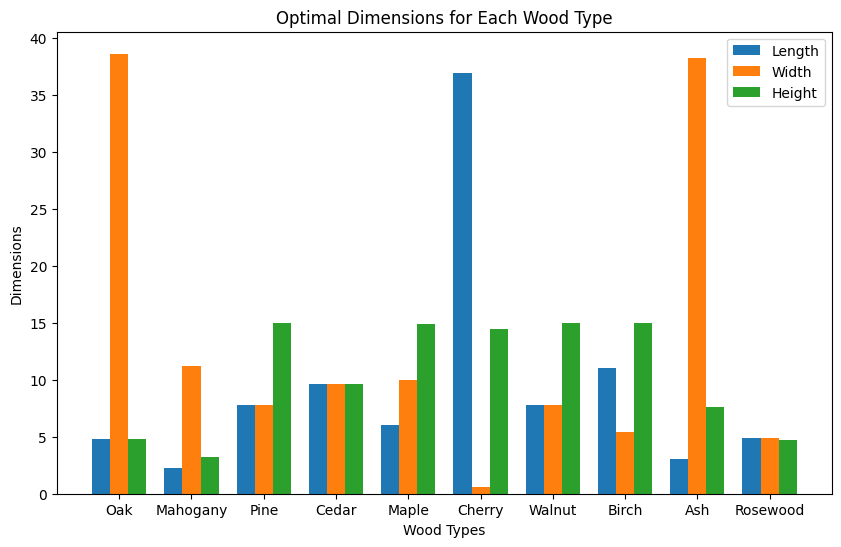

In [35]:

# Extract optimal solution values
optimal_lengths = [model.length[b].value for b in model.b]
optimal_widths = [model.width[b].value for b in model.b]
optimal_heights = [model.height[b].value for b in model.b]

# Bar Chart for Optimal Dimensions
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
bar_positions = np.arange(len(model.b))
ax.bar(bar_positions, optimal_lengths, width=bar_width, label='Length')
ax.bar(bar_positions + bar_width, optimal_widths, width=bar_width, label='Width')
ax.bar(bar_positions + 2 * bar_width, optimal_heights, width=bar_width, label='Height')

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(model.b)
ax.set_xlabel('Wood Types')
ax.set_ylabel('Dimensions')
ax.set_title('Optimal Dimensions for Each Wood Type')
ax.legend()
plt.show()


From this graph we can clearly see what of the three dimensions of the piece of wood is more used for each type of wood, this specially depends on the cost functions previously declared, where in each one the cost increases depending on the function for each type of wood. As we explained before, each cost function depending on the wood penalices in a bigger or smaller terms depending on the length, width and height in each type of wood. It is for this reason that we can see that in some woods like Oak or Ash the width is the most longer dimension meanwhile there are other types of wood that are more balanced between those three sizes and are the three of them almost the same like the Rosewood or Pine wood. This shows that applying non lineal functions to the cost of producing a specific type of wood can make significant variations in our model, where the profit not only depends on the revenue obtained from producing each type of wood, also the dimensions taken for each type of wood directly affects the cost.

### P2.8.3) Pie Chart: Wood Types

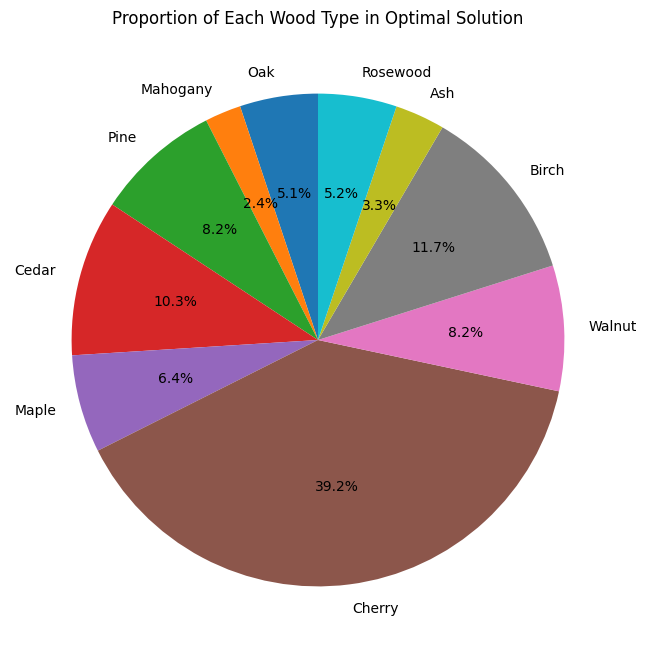

In [36]:
# Pie Chart for Wood Types
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(optimal_lengths, labels=model.b, autopct='%1.1f%%', startangle=90)
ax.set_title('Proportion of Each Wood Type in Optimal Solution')
plt.show()



We can obtain different insights by analyzing this graph that represents the percentage of the different types of wood produced, in this way we can obtain which wood was the most profitable (taking into consideration constraints like the demand or the waste limit). Firstly, the most produced wood was the cherry, probably due to its high revenue even though is not the wood that produces more revenue. After this wood there are different types that shares a similar percentage like Walmut, Cedar or Birch, related to this woods are different factors that can affect to the production of this type of woods such as the demand or the waste produced for this woods. Finally there are the rest of the woods that are significant less production but it is interesting to see that any wood has a lower percentage than 2.7%, so we can see there is more or less balance of production, not ignoring any type of wood. <br>

We can see that the non lineal cost functions directly affects to the production percentage of each type of wood, where due to its high range of values that it can takes these cost functions, the model has to be careful about choosing what and how many wood should be produced to maximize profits.

### P2.8.4) Scatter Plot: Revenue vs. Cost

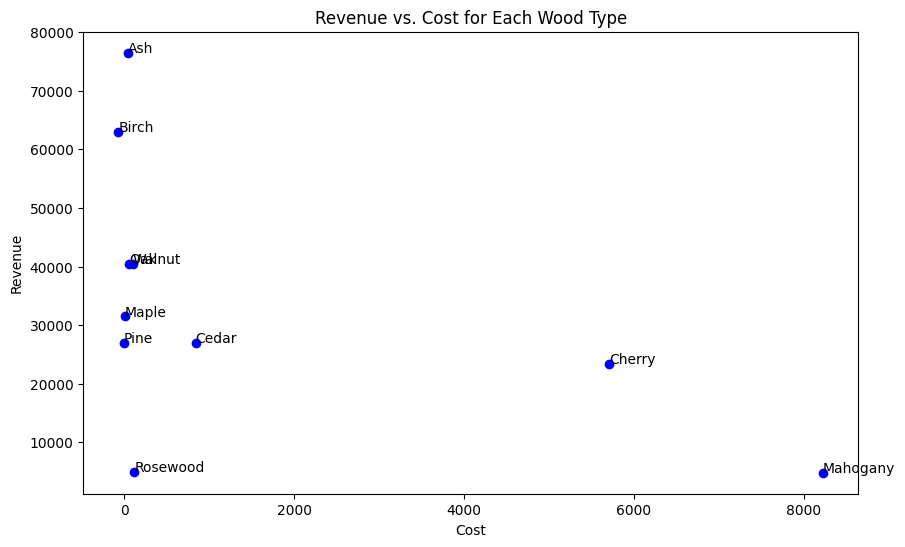

In [37]:
# Extract optimal revenue and cost values
optimal_revenue = [value(model.revenue[b]) for b in model.b]
optimal_cost = [value(model.cost[b]) for b in model.b]

# Scatter Plot for Revenue vs. Cost
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(optimal_cost, optimal_revenue, color='blue')
ax.set_xlabel('Cost')
ax.set_ylabel('Revenue')
ax.set_title('Revenue vs. Cost for Each Wood Type')

# Annotate each point with the wood type
for i, b in enumerate(model.b):
    ax.annotate(b, (optimal_cost[i], optimal_revenue[i]))

plt.show()


In this graph we can appreciate the comparison between the revenue generated by each wood type and its respective cost. The ideal scenario would be to maximize the woods with the highest revenue and lowest cost, but due to other factors such as the demand on other not so profitable woods, the waste or the maximum size restrictions it is not possible to just focus on this aspect, it is for this reason that woods like Ash produces so high revenues and so low costs but it is one of the less produced woods. There are other more balanced woods between revenue and cost like Cherry, which we can consider it a mid term between the revenue and cost produced when producing this type of wood. 

It is important to mention that most woods has higher revenues compared to costs, so we can see that most woods are quite worth it to produce in order to obtain profits. But there is one particular wood that is Mahogany, which costs is significantly higher than the revenue produced, probably this is the main reason of its low production as we could see in the previously explained pie chart.

We consider this graph quite interesting in order to understand what would be the most benefitial woods that should be produced in order to only maximize the objective function, not taking into consideration other constraints. However, this constraints ensure a realistic and understandable problem that the model must analyze in order to find the most optimal objective value.

## P2.9) Conclusion

During this work we faced a problem of producing pieces of wood of different type taking into consideration the dimensions of each type of wood produced. Each wood had its own cost function that consists in lineal and non-lineal functions in order to have several scenarios and possibilities. This cost functions depended on the dimensions of each piece of wood, for instance, some woods had a higher cost for producing a higher height than a width, among other possibilities, in this way we obtained a huge problem where the model must take into consideration several aspects in order to know not only which type of wood, also the dimensions of that type of wood that wants to be produced. All this with a unique purpose of maximizing the profit obtain (computing the total dimension of each wood produced multiplied by the revenue that producing a unit of that wood produces minus the cost function that depending on the dimension of the piece of wood could be higher or lower). 

We initialized our continuous decision variables that would contain the information of the dimensions for each type of wood (length, width and height) and the parameters in order to impose several constraints. In our case, we only had non lineal constraints, however, it was possible to add lineal constraints but we decided it was not necessary and it would not offer any more interesting insights that could be studied. We impossed several constraints related to the total maximum amount of wood that could be produced and also the maximum volume that a wood could have. We also had other constraints in order to control the surface of each piece of wood. Furthermore, we also added other constraints in order to fulfill a demand of each type of wood and to control the waste generated from producing a certain type of wood. In this way, we had a problem that not also contained non lineal factors that could make the problem significantly big, it also has different constraints which the model must analyze in order to adapt to them and find the most optimal result.

Thanks to our visual interpretation through graphs and explainign those graphs it was easier to understand the results obtained and to what extend we found a relevant result. From our point of view, we found an interesting problem to solve and obtained good results involving several aspects that the model took into account in order to finally maximize the profit generated from producing the 10 different types of wood. In total we had 30 decision variables and 5 non-trivial constraints which we consider it to be a broad problem where we took advantage of a non lineal solver as 'ipopt' in order to find answer to a situation that involves the analyzing of thousands of different scenarios.